#### This project aims to analyze e-commerce data to gain insights into product and category trends, identify factors influencing web purchases, evaluate success of marketing campaigns and determine underperforming channels.

### Project Outline

1. Data Cleaning
* Handling missing values (check for missing values in each column);
* Removing duplicates (identify and remove duplicates to ensure data integrity).

2. Data Analysis
* Most frequent categories (identify most frequently sold categories);
* Marketing campaign analysis (analyze success of different marketing campaigns by comparing with sales data);
* Channel performance (assess performance of different channels by comparing engagement metrics. Identify underperforming channels);

3. Data Visualization 
* Frequent categories (bar chart to show most frequent categories).

In [1]:
import pandas as pd

data = pd.read_csv("/Users/kristapsmikuckis/Desktop/E-Commerce.csv")

In [2]:
null_values = data.isnull().sum()
null_values

ID                                0
domain                            0
categories                     1485
city                           4804
state                          4709
estimated_monthly_sales        1105
products_sold                     0
platform                          0
theme                             0
technologies                    980
estimated_monthly_pageviews     834
estimated_monthly_visits        834
facebook_url                   3392
facebook_followers             4421
instagram_url                  2804
instagram_followers            5003
instagram_posts                5067
twitter_url                    7239
twitter_followers              7423
twitter_posts                  7439
linkedin_url                   7374
youtube_url                    7703
youtube_followers              7813
pinterest_url                  8830
pinterest_followers            8995
pinterest_posts                8919
tiktok_url                     9169
tiktok_followers            

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   domain                       10000 non-null  object 
 2   categories                   8515 non-null   object 
 3   city                         5196 non-null   object 
 4   state                        5291 non-null   object 
 5   estimated_monthly_sales      8895 non-null   object 
 6   products_sold                10000 non-null  int64  
 7   platform                     10000 non-null  object 
 8   theme                        10000 non-null  object 
 9   technologies                 9020 non-null   object 
 10  estimated_monthly_pageviews  9166 non-null   float64
 11  estimated_monthly_visits     9166 non-null   float64
 12  facebook_url                 6608 non-null   object 
 13  facebook_follower

In [4]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
from collections import Counter
from itertools import chain
import re

def preprocess_categories(categories):
    if pd.isna(categories):
        return []
    if not isinstance(categories, str):
        return []
    words = re.findall(r'\b\w+\b', categories.lower())
    return words

data['processed_categories'] = data['categories'].apply(preprocess_categories)
exploded_data = data.explode('processed_categories')
category_sales = exploded_data.groupby('processed_categories')['products_sold'].sum()
sorted_category_sales = category_sales.sort_values(ascending=False)
most_frequent_categories = sorted_category_sales.head(10)
print("Most frequently sold categories:")
print(most_frequent_categories)
all_words = list(chain.from_iterable(data['processed_categories']))
word_counter = Counter(all_words)

Most frequently sold categories:
processed_categories
apparel                 16044844
computers               13282310
clothing_accessories    12903331
computer_hardware       12481200
laptops_notebooks        8289487
food_drink               4728776
desktop_computers        3512153
books_literature         2071543
beauty_fitness           1967558
home_garden              1462501
Name: products_sold, dtype: int64


In [15]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

data['total_facebook'] = data['facebook_followers']
data['total_instagram'] = data['instagram_followers'] + data['instagram_posts']
data['total_twitter'] = data['twitter_followers'] + data['twitter_posts']
data['total_pinterest'] = data['pinterest_followers'] + data['pinterest_posts']
data['total_tiktok'] = data['tiktok_followers']
data['total_youtube'] = data['youtube_followers']

X = data[['total_facebook', 'total_instagram', 'total_twitter', 'total_pinterest', 'total_tiktok', 'total_youtube']]
y = data['products_sold']
X = X.fillna(X.mean())
y = y.fillna(y.mean())
X = sm.add_constant(X)

print("Coefficients:")
print(model.params)

Coefficients:
const              4695.226541
total_facebook        0.002851
total_instagram      -0.002018
total_twitter         0.002067
total_pinterest       0.003954
total_tiktok         -0.000503
total_youtube         0.009519
dtype: float64


In [22]:
engagement_columns = [
    'facebook_followers', 'instagram_followers', 'instagram_posts',
    'twitter_followers', 'twitter_posts', 'youtube_followers',
    'pinterest_followers', 'pinterest_posts', 'tiktok_followers'
]

for column in engagement_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce').fillna(0)

mean_followers = {
    'Facebook': data['facebook_followers'].mean(),
    'Instagram': data['instagram_followers'].mean(),
    'Twitter': data['twitter_followers'].mean(),
    'YouTube': data['youtube_followers'].mean(),
    'Pinterest': data['pinterest_followers'].mean(),
    'TikTok': data['tiktok_followers'].mean()
}

mean_posts = {
    'Instagram': data['instagram_posts'].mean(),
    'Twitter': data['twitter_posts'].mean(),
    'Pinterest': data['pinterest_posts'].mean()
}

underperforming_followers_counts = {
    'Facebook': (data['facebook_followers'] < mean_followers['Facebook']).sum(),
    'Instagram': (data['instagram_followers'] < mean_followers['Instagram']).sum(),
    'Twitter': (data['twitter_followers'] < mean_followers['Twitter']).sum(),
    'YouTube': (data['youtube_followers'] < mean_followers['YouTube']).sum(),
    'Pinterest': (data['pinterest_followers'] < mean_followers['Pinterest']).sum(),
    'TikTok': (data['tiktok_followers'] < mean_followers['TikTok']).sum()
}

underperforming_posts_counts = {
    'Instagram': (data['instagram_posts'] < mean_posts['Instagram']).sum(),
    'Twitter': (data['twitter_posts'] < mean_posts['Twitter']).sum(),
    'Pinterest': (data['pinterest_posts'] < mean_posts['Pinterest']).sum()
}

underperforming_followers_ranking = sorted(underperforming_followers_counts.items(), key=lambda x: x[1], reverse=True)
underperforming_posts_ranking = sorted(underperforming_posts_counts.items(), key=lambda x: x[1], reverse=True)

max_followers_ranking = sorted(mean_followers.items(), key=lambda x: x[1], reverse=True)
max_posts_ranking = sorted(mean_posts.items(), key=lambda x: x[1], reverse=True)

most_common_channels_counts = {
    'Facebook': (data['facebook_followers'] > 0).sum(),
    'Instagram': (data['instagram_followers'] > 0).sum(),
    'Twitter': (data['twitter_followers'] > 0).sum(),
    'YouTube': (data['youtube_followers'] > 0).sum(),
    'Pinterest': (data['pinterest_followers'] > 0).sum(),
    'TikTok': (data['tiktok_followers'] > 0).sum(),
    'Instagram Posts': (data['instagram_posts'] > 0).sum(),
    'Twitter Posts': (data['twitter_posts'] > 0).sum(),
    'Pinterest Posts': (data['pinterest_posts'] > 0).sum()
}

most_common_channels_ranking = sorted(most_common_channels_counts.items(), key=lambda x: x[1], reverse=True)

print("Underperforming channels based on followers:")
for rank, (channel, _) in enumerate(underperforming_followers_ranking, start=1):
    print(f"{rank}. {channel}")

print("\nUnderperforming channels based on posts:")
for rank, (channel, _) in enumerate(underperforming_posts_ranking, start=1):
    print(f"{rank}. {channel}")

print("\nChannels with the most followers:")
for rank, (channel, _) in enumerate(max_followers_ranking, start=1):
    print(f"{rank}. {channel}")

print("\nChannels with the most posts:")
for rank, (channel, _) in enumerate(max_posts_ranking, start=1):
    print(f"{rank}. {channel}")

Underperforming channels based on followers:
1. Twitter
2. Pinterest
3. TikTok
4. YouTube
5. Facebook
6. Instagram

Underperforming channels based on posts:
1. Pinterest
2. Twitter
3. Instagram

Channels with the most followers:
1. Facebook
2. Instagram
3. Twitter
4. YouTube
5. TikTok
6. Pinterest

Channels with the most posts:
1. Pinterest
2. Twitter
3. Instagram


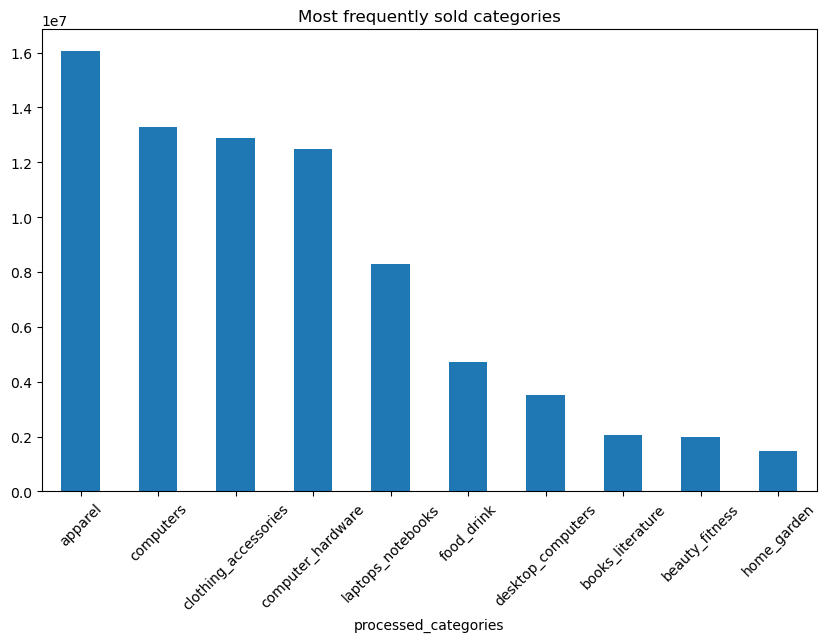

In [25]:
import matplotlib.pyplot as plt

def preprocess_categories(categories):
    if pd.isna(categories):
        return []
    if not isinstance(categories, str):
        return []
    words = re.findall(r'\b\w+\b', categories.lower())
    return words

data['processed_categories'] = data['categories'].apply(preprocess_categories)
exploded_data = data.explode('processed_categories')
category_sales = exploded_data.groupby('processed_categories')['products_sold'].sum()
sorted_category_sales = category_sales.sort_values(ascending=False)
most_frequent_categories = sorted_category_sales.head(10)

plt.figure(figsize=(10, 6))
most_frequent_categories.plot(kind='bar')
plt.title('Most frequently sold categories')
plt.xticks(rotation=45)
plt.show()